# Community detection - **Igraph**

---------------------------------------------

Installing libraries



In [ ]:
!pip install python-igraph
!pip install cairocffi

     |████████████████████████████████| 3.2MB 5.8MB/s 
     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp36-none-any.whl size=89552 sha256=720ec455b2442f371a8ba552b2e279fce427f13d45efc7fdba95d1d3532f7cfa
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [ ]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.optimize import curve_fit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating a **graph** from a pandas dataframe

In [ ]:
def get_graph(adj_matfile, neuron_namesfile):
    # import the adjacency matrix from text file
    adjacency = np.loadtxt(adj_matfile,dtype='int')
    print("Shape of adjacency matrix:", adjacency.shape)

    # import names of each neuron
    f = open(neuron_namesfile,"r") #opens file with name of "test.txt"
    neuron_names = []
    for line in f:
        neuron_names.append(line[:-1]) #[:-1] because we don't want /n in the end.  
    #print((neuron_names2))
    n_neurons = len(neuron_names)
    print("Total number of neurons:",n_neurons)
    
    # create node and node attributes which is the name for the graph
    nodes_list = []
    for i in range(len(neuron_names)):
        #node attribute is given by its neuron name
        nodes_list.append((i,{"name":neuron_names[i]}))
    #print(len(nodes_list))

    # creating an edge list from adjacency matrix
    edge_list=[]
    for i in range(len(neuron_names)):
        for j in range(len(neuron_names)):
            if adjacency[i,j]==0: # if there's no weight, let's forget the edge.
                pass
            else:
                edge_list.append( (i,j,{"weight":adjacency[i,j],"Label":"%s - %s"%(neuron_names[i],neuron_names[j])}) )
    # Creating a directed graph from adjacency matrix so that it will be easy to deal using the networkx module

    G = nx.DiGraph()

    # Add all the nodes to the graph
    G.add_nodes_from(nodes_list)
    # Add all the edges to the graph
    G.add_edges_from(edge_list)

    return adjacency, neuron_names, n_neurons, G

In [ ]:
adj, neuron_names, number_neurons, G = get_graph("/content/drive/MyDrive/Network Science/Delfina/adjacency.txt", "/content/drive/MyDrive/Network Science/Delfina/neuron_names.txt")


Shape of adjacency matrix: (3163, 3163)
Total number of neurons: 3163


In [ ]:
G.is_directed()

True

In [ ]:
def extract_community(method, n_communities):
  community_node = []
  community = []
  for i in range(n_communities+1):
    df = pd.read_csv('/content/drive/MyDrive/Delfina/Files Community - Largest component/'+method+str(i)+'.csv')
    for j in range(len(df['Community'])):
      community_node.append(df['Node'][j])
      community.append(df['Community'][j])

  df = pd.DataFrame([community_node, community])
  df = df.T
  df.columns = ['Node', 'Community']
  print(len(df))

  return df

In [ ]:
df_infomap = extract_community("infomap", 33)

3154


In [ ]:
df_waltrap = extract_community("Waltrap", 32)

3154


In [ ]:
df_label_propagation = extract_community("label_propagation", 8)

3154


In [ ]:
df_louvian_RBER  =  extract_community("Louvian_RBER", 47)
df_louvian_CPM  =  extract_community("Louvian_CPM", 51)

3154
3154


In [ ]:
df_louvian =  extract_community("Louvian_Modularity", 8)


3154


In [ ]:
df_louvian_sig =  extract_community("Louvian_Significance", 108)


3154


In [ ]:
df_louvian_sur =  extract_community("Louvian_Surprise", 134)


3154


In [ ]:
df_spinglass =  extract_community("spinglass", 16)

3154


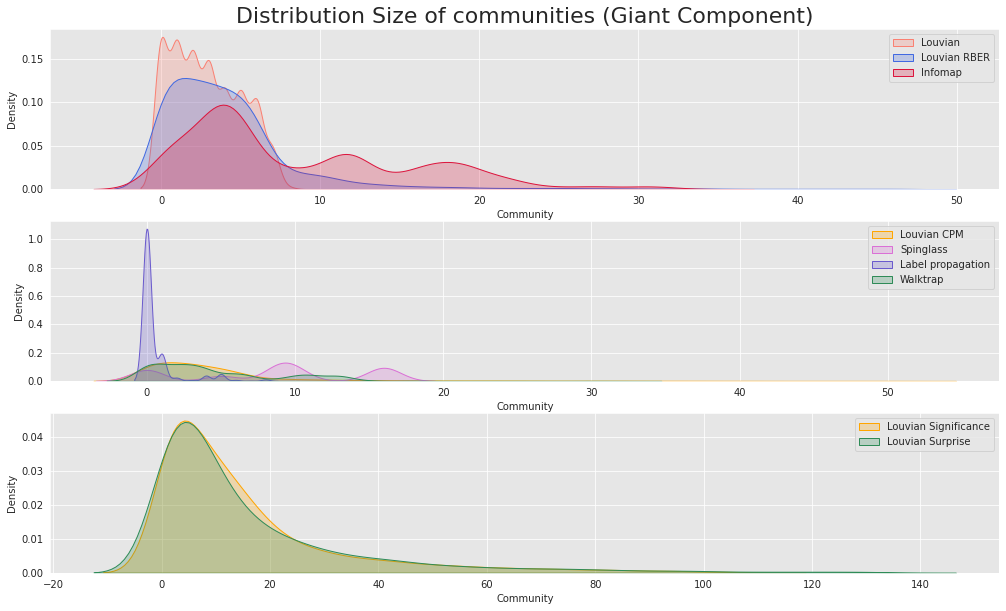

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.color_palette("pastel", as_cmap=True)

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(17,10))

ax1.set_title("Distribution Size of communities (Giant Component)", fontsize = 22)
sns.kdeplot(df_louvian['Community'], shade=True, label = 'Louvian', ax = ax1, color = "salmon")
sns.kdeplot(df_louvian_RBER['Community'], shade=True, label = 'Louvian RBER', ax = ax1, color = "royalblue")
sns.kdeplot(df_louvian_CPM['Community'], shade=True, label = 'Louvian CPM', ax = ax2,  color = "orange")
sns.kdeplot(df_spinglass['Community'], shade=True, label = 'Spinglass', ax = ax2, color = "orchid")
sns.kdeplot(df_louvian_sig['Community'], shade=True, label = 'Louvian Significance', ax = ax3, color = "orange")
sns.kdeplot(df_louvian_sur['Community'], shade=True, label = 'Louvian Surprise', ax = ax3, color = "seagreen")
sns.kdeplot(df_label_propagation['Community'], shade=True, label = 'Label propagation', ax = ax2, color = "slateblue")
sns.kdeplot(df_waltrap['Community'], shade=True, label = 'Walktrap', ax = ax2, color = "seagreen")
sns.kdeplot(df_infomap['Community'], shade=True, label = 'Infomap', ax = ax1, color = "crimson")
ax2.legend()
ax1.legend()
ax3.legend()

We can conclude that all algorithms but Infomap search for larger size of brain regions whereas infomap maight tell us about more specific areas. Regardless of the fact that Louvian has only $\sim 10$ communities we can see that this is a similar tren in all of the other ones (taking out infomap)  

In [ ]:
np.max(adj)

687

In [ ]:
largest = max(nx.strongly_connected_components(G), key=len)

In [ ]:
G_lc = G.subgraph(largest)

In [ ]:
adj = nx.adjacency_matrix(G_lc)

In [ ]:
adj = np.array(adj.todense())

In [ ]:
for i in range(len(df_louvian)):
  if df_louvian['Node'][i] >= 3154:
    df_louvian['Node'][i] == i

In [ ]:
def plot_heatmap(df1, method):
  arrange = list(df1['Node'].values)
  adj2 = adj[:, arrange][arrange]
#  adj2= adj2/np.max(adj2)
  df = pd.DataFrame(adj2)
  plt.figure(figsize = (15,10))
  sns.color_palette("flag", as_cmap=True)
  r = sns.heatmap(df, cmap = "nipy_spectral_r")
  r.set_title("Clustering by "+str(method))

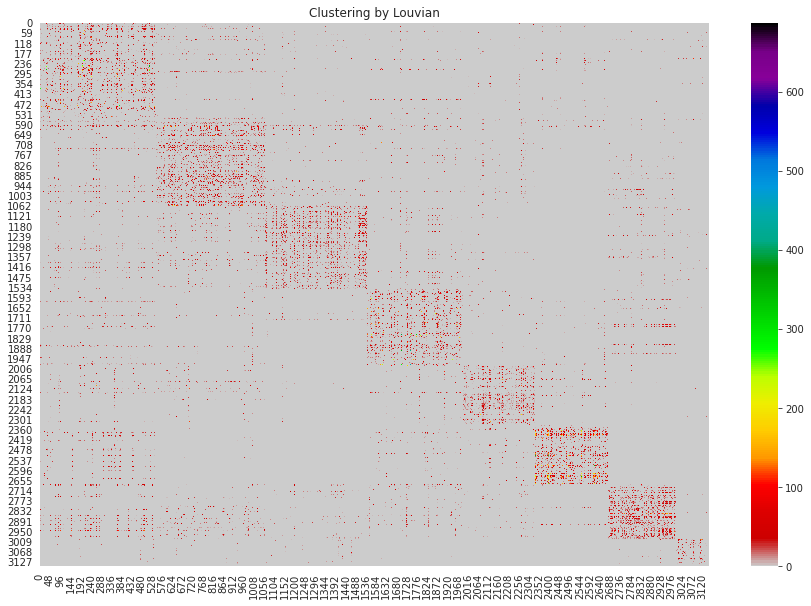

In [ ]:
plot_heatmap(df_louvian, "Louvian")

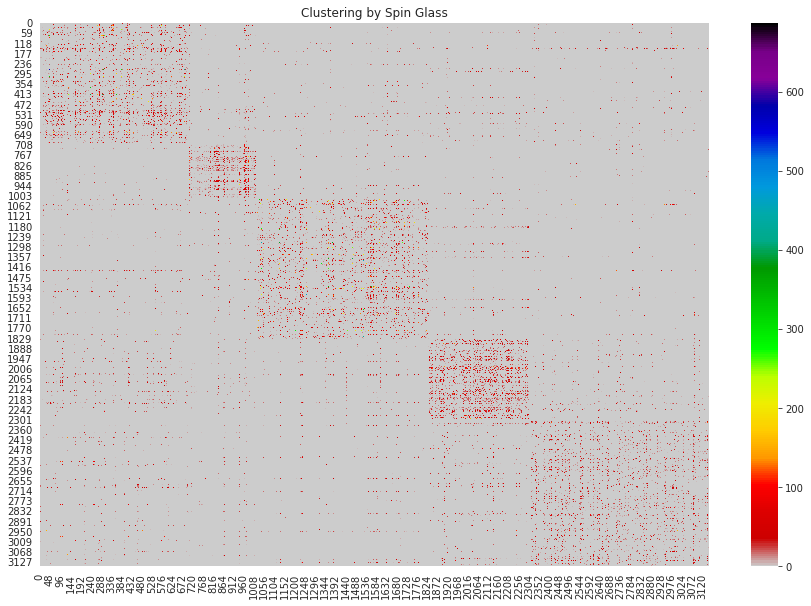

In [ ]:
for i in range(len(df_louvian)):
  if df_spinglass['Node'][i] >= 3154:
    df_spinglass['Node'][i] == i

plot_heatmap(df_spinglass, "Spin Glass")

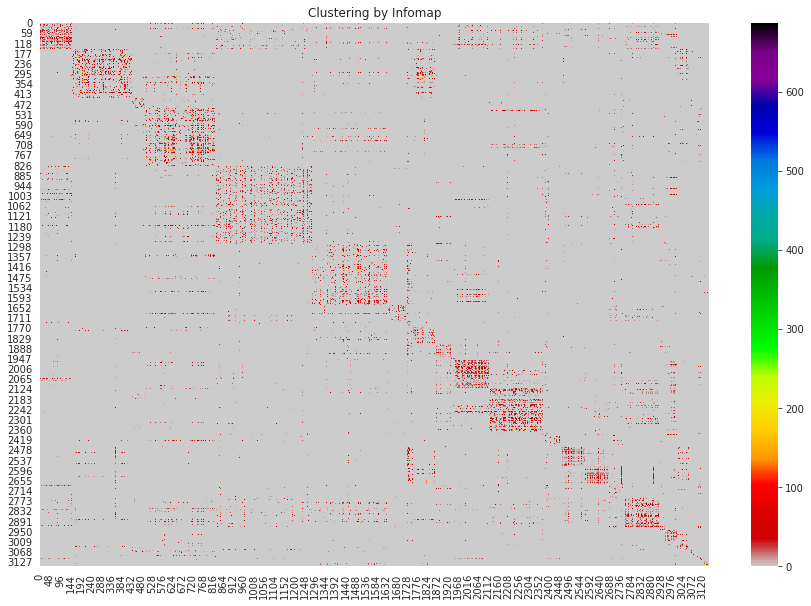

In [ ]:
for i in range(len(df_louvian)):
  if df_infomap['Node'][i] >= 3154:
    df_infomap['Node'][i] == i

plot_heatmap(df_infomap, "Infomap")

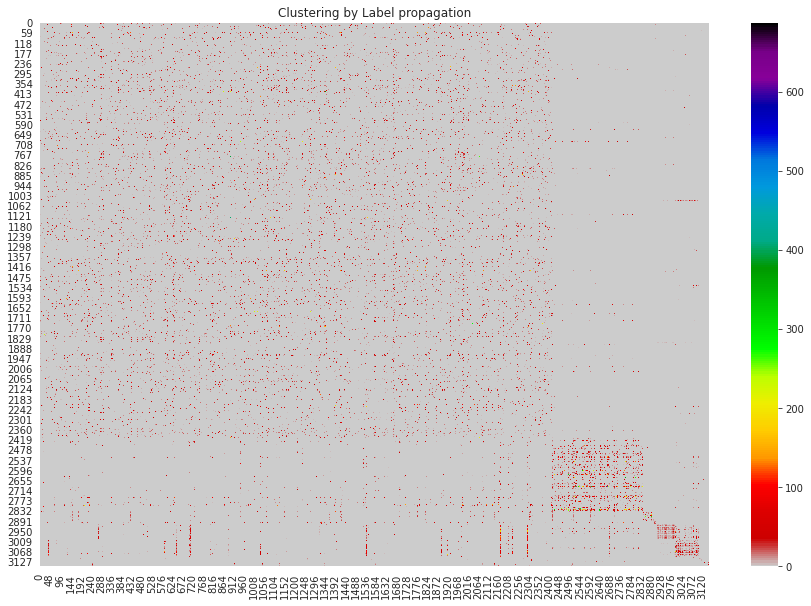

In [ ]:
for i in range(len(df_louvian)):
  if df_label_propagation['Node'][i] >= 3154:
    df_label_propagation['Node'][i] == i

plot_heatmap(df_label_propagation, "Label propagation")

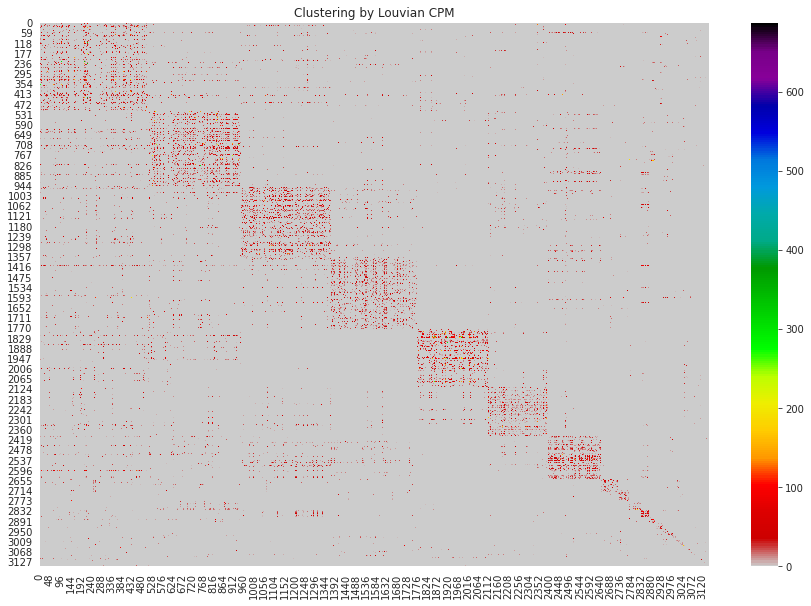

In [ ]:
for i in range(len(df_louvian)):
  if df_louvian_CPM['Node'][i] >= 3154:
    df_louvian_CPM['Node'][i] == i

plot_heatmap(df_louvian_CPM, "Louvian CPM")

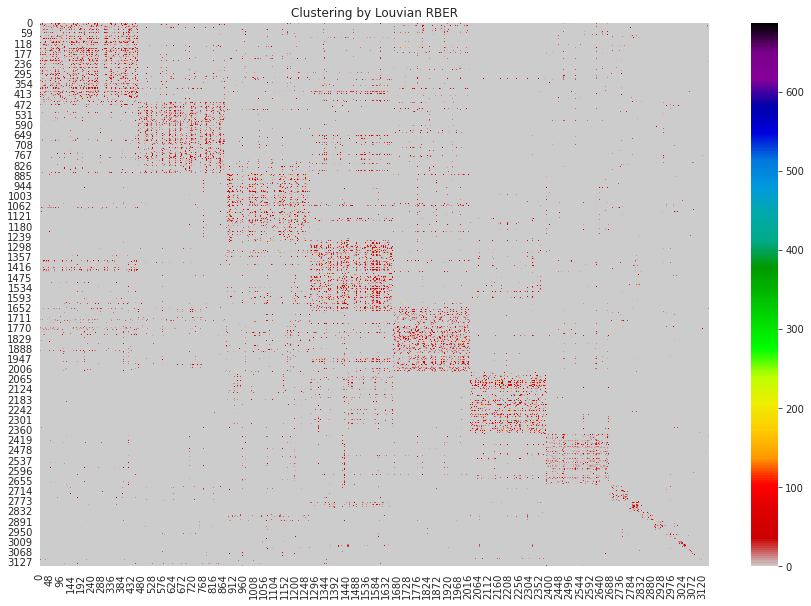

In [ ]:
for i in range(len(df_louvian)):
  if df_louvian_RBER['Node'][i] >= 3154:
    df_louvian_RBER['Node'][i] == i

plot_heatmap(df_louvian_RBER, "Louvian RBER")

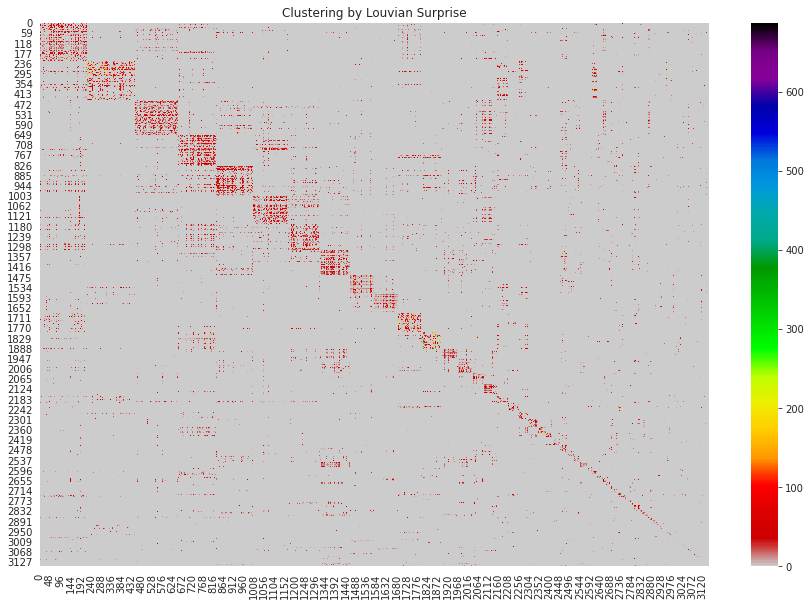

In [ ]:
for i in range(len(df_louvian)):
  if df_louvian_sur['Node'][i] >= 3154:
    df_louvian_sur['Node'][i] == i

plot_heatmap(df_louvian_sur, "Louvian Surprise")

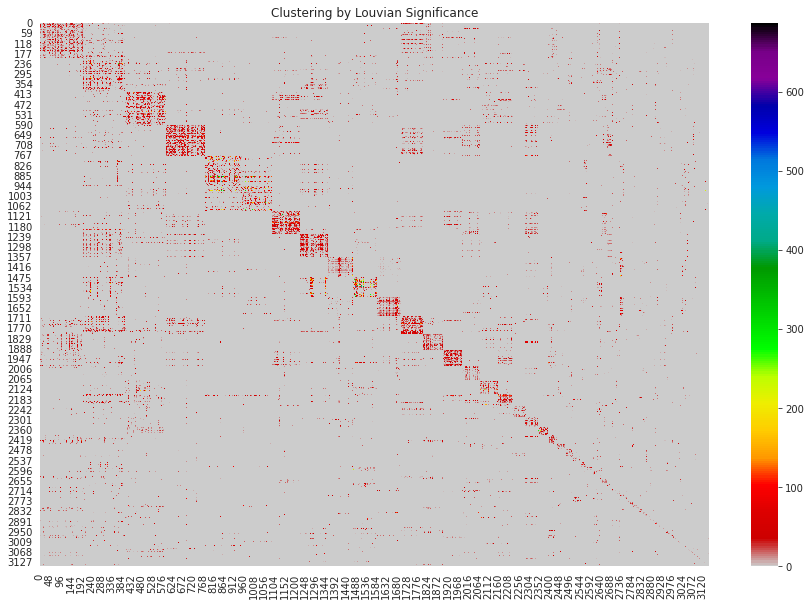

In [ ]:
for i in range(len(df_louvian)):
  if df_louvian_sig['Node'][i] >= 3154:
    df_louvian_sig['Node'][i] == i

plot_heatmap(df_louvian_sig, "Louvian Significance")

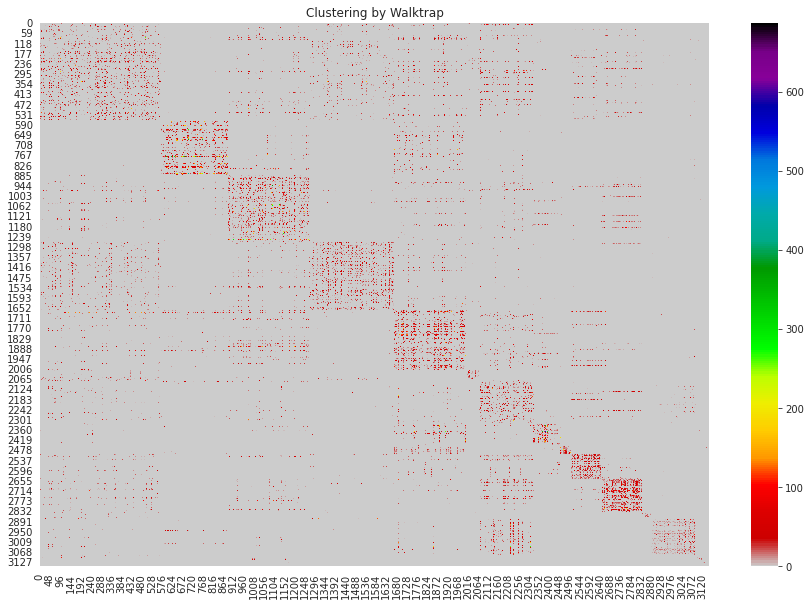

In [ ]:
for i in range(len(df_louvian)):
  if df_waltrap['Node'][i] >= 3154:
    df_waltrap['Node'][i] == i

plot_heatmap(df_waltrap, "Walktrap")

## Conductance

In [ ]:
def compute_conductance(method):
  nodes = []
  conductance = []
  for i in range(3154):
    #print(i)
    if method['Node'][i] == 0:
      pass
    else:  
      nodes.append(method['Node'][i])
      conductance.append(nx.conductance(G_lc, nodes))
  return nodes, conductance

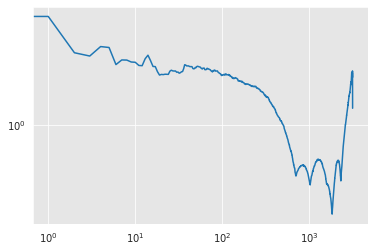

In [ ]:
node_spin, conductance_spin = compute_conductance(df_spinglass)
df_conductance_spin = pd.DataFrame([node_spin, conductance_spin])
df_conductance_spin.to_csv("conductance_spin_lc.csv", index = False)
plt.loglog(conductance_spin)

In [ ]:
node_louvian_infomap, conductance_infomap = compute_conductance(df_infomap)

In [ ]:
df_conductance_infomap = pd.DataFrame([node_louvian_infomap, conductance_infomap])
df_conductance_infomap.to_csv("conductance_infomap_lc.csv", index = False)

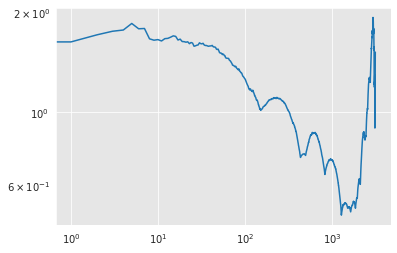

In [ ]:
plt.loglog(conductance_infomap)

In [ ]:
node_label_propagatio, conductance_label_propagatio = compute_conductance(df_label_propagation)

In [ ]:
df_conductance_label = pd.DataFrame([node_label_propagatio, conductance_label_propagatio])
df_conductance_label.to_csv("conductance_label_lc.csv", index = False)

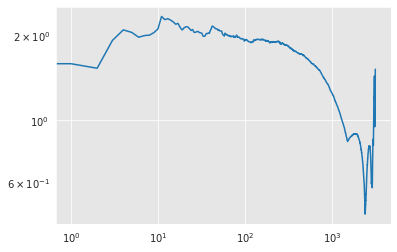

In [ ]:
plt.loglog(conductance_label_propagatio)

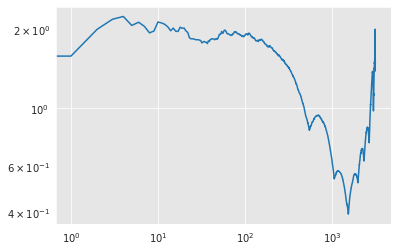

In [ ]:
node_df_louvian, conductance_df_louvian = compute_conductance(df_louvian)
plt.loglog(conductance_df_louvian)

In [ ]:
df_conductance_louvian = pd.DataFrame([node_df_louvian, conductance_df_louvian])
df_conductance_louvian.to_csv("conductance_louvia_lc.csv", index = False)

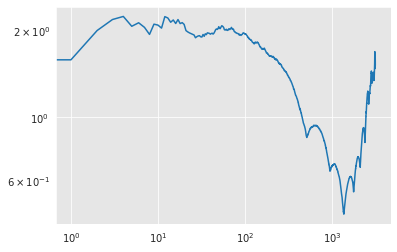

In [ ]:
node_df_louvian_CPM, conductance_df_louvian_CPM = compute_conductance(df_louvian_CPM)
plt.loglog(conductance_df_louvian_CPM)

In [ ]:
df_conductance_louvian_CPM = pd.DataFrame([node_df_louvian_CPM, conductance_df_louvian_CPM])
df_conductance_louvian_CPM.to_csv("conductance_louvia_CPM_lc.csv", index = False)

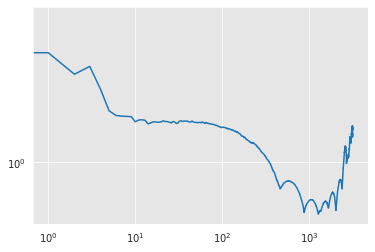

In [ ]:
node_df_louvian_RBER, conductance_df_louvian_RBER = compute_conductance(df_louvian_RBER)
plt.loglog(conductance_df_louvian_RBER)

In [ ]:
df_conductance_louvian_RBER = pd.DataFrame([node_df_louvian_RBER, conductance_df_louvian_RBER])
df_conductance_louvian_RBER.to_csv("conductance_louvia_RBER_lc.csv", index = False)

In [ ]:
node_df_louvian_sig, conductance_df_louvian_sig = compute_conductance(df_louvian_sig)


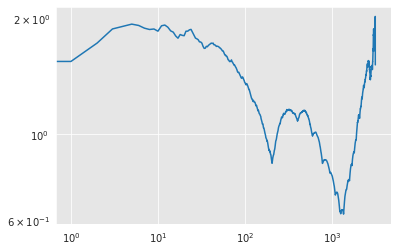

In [ ]:
plt.loglog(conductance_df_louvian_sig)

In [ ]:
df_conductance_louvian_sig = pd.DataFrame([node_df_louvian_sig, conductance_df_louvian_sig])
df_conductance_louvian_sig.to_csv("conductance_louvia_sig_lc.csv", index = False)

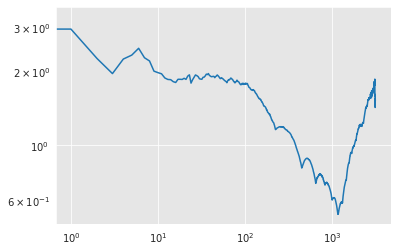

In [ ]:
node_df_louvian_sur, conductance_df_louvia_sur = compute_conductance(df_louvian_sur)
plt.loglog(conductance_df_louvia_sur)

In [ ]:
df_conductance_louvian_sur = pd.DataFrame([node_df_louvian_sur, conductance_df_louvia_sur])
df_conductance_louvian_sur.to_csv("conductance_louvia_sur_lc.csv", index = False)

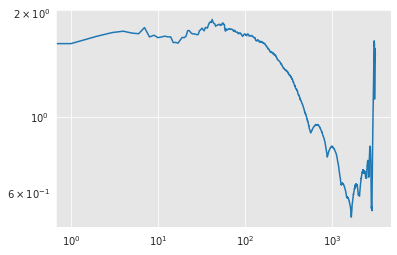

In [ ]:
node_waltrap, conductance_waltrap = compute_conductance(df_waltrap)
plt.loglog(conductance_waltrap)

In [ ]:
df_conductance_wtrap = pd.DataFrame([node_waltrap, conductance_waltrap] )
df_conductance_wtrap.to_csv("conductance_wtrap_lc.csv", index = False)

In [ ]:
df_conductance_infomap = pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_infomap_lc.csv')
df_conductance_label =   pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_label_lc.csv')
df_conductance_louvian_CPM =  pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_louvia_CPM_lc.csv')

df_conductance_louvian_RBER =  pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_louvia_RBER_lc.csv')
df_conductance_louvian_sig =  pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_louvia_sig_lc.csv')
df_conductance_louvian_sur =  pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_louvia_sur_lc.csv')
df_conductance_louvian =  pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_louvia_lc.csv')
df_conductance_wtrap =  pd.read_csv('/content/drive/MyDrive/Delfina/Conductance(GC)/conductance_wtrap_lc.csv')

In [ ]:
df_conductance_infomap = df_conductance_infomap.T
df_conductance_label =  df_conductance_label.T
df_conductance_louvian_CPM = df_conductance_louvian_CPM.T
df_conductance_louvian_RBER = df_conductance_louvian_RBER.T
df_conductance_louvian_sig = df_conductance_louvian_sig.T
df_conductance_louvian_sur = df_conductance_louvian_sur.T
df_conductance_louvian = df_conductance_louvian.T
df_conductance_wtrap = df_conductance_wtrap.T


In [ ]:
df_conductance_infomap.columns = ['Node', 'Conductance']
df_conductance_label.columns = ['Node', 'Conductance']
df_conductance_louvian_CPM.columns = ['Node', 'Conductance']

df_conductance_louvian_RBER.columns = ['Node', 'Conductance']
df_conductance_louvian_sig.columns = ['Node', 'Conductance']
df_conductance_louvian_sur.columns = ['Node', 'Conductance']
df_conductance_louvian.columns = ['Node', 'Conductance']
df_conductance_wtrap.columns = ['Node', 'Conductance']

In [ ]:
def ncpp(df, methiod):  
  min_wtrap = df[df[ 'Conductance'] == min(df[ 'Conductance'])].index[0]
  print("Method:", str(methiod))
  print("Optimal size :", min_wtrap)
  print("Minimum value of Conductance:", min(df['Conductance']))
  return min_wtrap


In [ ]:
min_infomap = ncpp(df_conductance_infomap, "infomap")
min_label = ncpp(df_conductance_label, "label")
min_louvian_CPM = ncpp(df_conductance_louvian_CPM, "louvian CPM")
min_louvian_RBER  =ncpp(df_conductance_louvian_RBER, "louvain RBER")
min_louvian_sig =ncpp(df_conductance_louvian_sig, "louvian sig")
min_louvian_sur = ncpp(df_conductance_louvian_sur, "louvian sur")
min_louvian = ncpp(df_conductance_louvian, "louvian")
min_wtrap = ncpp(df_conductance_wtrap, "walktrap")

Method: infomap
Optimal size : 1284
Minimum value of Conductance: 0.4874685973137104
Method: label
Optimal size : 2411
Minimum value of Conductance: 0.4645140753453096
Method: louvian CPM
Optimal size : 1371
Minimum value of Conductance: 0.4572486176946686
Method: louvain RBER
Optimal size : 1272
Minimum value of Conductance: 0.4782901567212142
Method: louvian sig
Optimal size : 1360
Minimum value of Conductance: 0.6215657973322716
Method: louvian sur
Optimal size : 1179
Minimum value of Conductance: 0.5261032642722161
Method: louvian
Optimal size : 1543
Minimum value of Conductance: 0.3938760719893707
Method: walktrap
Optimal size : 1668
Minimum value of Conductance: 0.5114605138906315


In [ ]:
x = np.linspace(1, len(conductance_waltrap), len(conductance_waltrap))

Text(0.5, 0, 'Size of clusters')

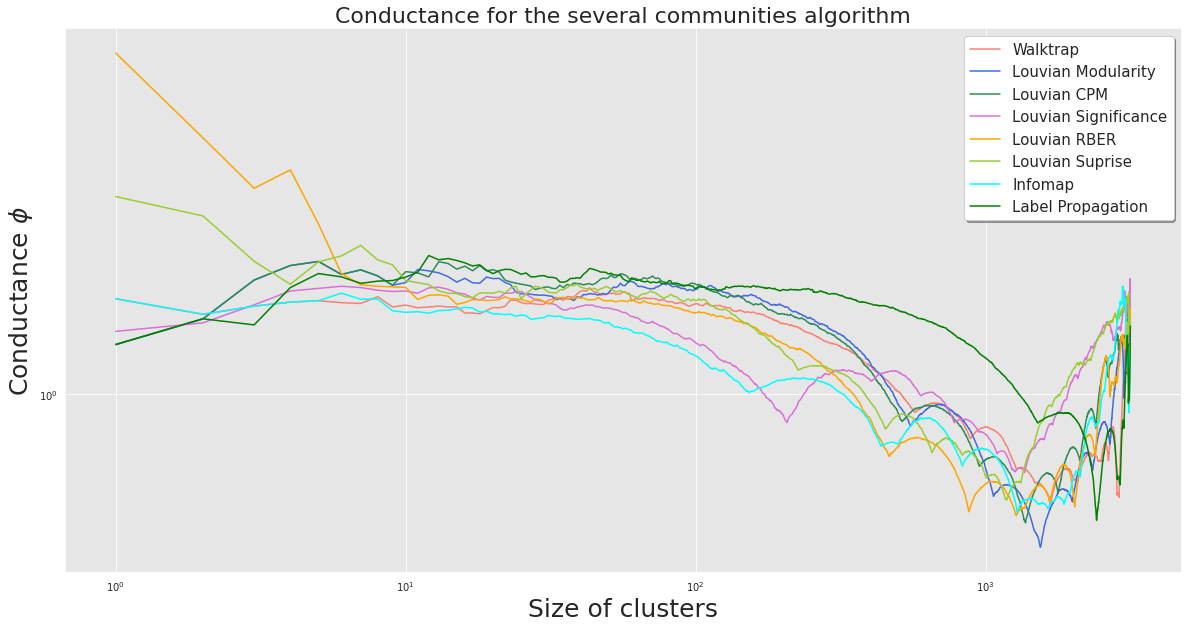

In [ ]:
plt.figure(figsize=(20,10))
#plt.axvline(min_wtrap, color = 'salmon',linewidth=4 )
plt.loglog(x, df_conductance_wtrap['Conductance'], label = 'Walktrap', color = 'salmon')
#plt.axvline(min_louvian, color = 'royalblue', linewidth=4)
plt.loglog(x, df_conductance_louvian['Conductance'], label = 'Louvian Modularity', color = 'royalblue')
#plt.axvline(min_louvian_CPM, color = 'seagreen', linewidth=4)
plt.loglog(x, df_conductance_louvian_CPM['Conductance'], label = 'Louvian CPM', color = 'seagreen')
#plt.axvline(min_louvian_sig, color = 'plum', linewidth=4)
plt.loglog(x, df_conductance_louvian_sig['Conductance'], label = 'Louvian Significance', color = 'orchid')
#plt.axvline(min_louvian_RBER, color = 'orange', linewidth=4)
plt.loglog(x, df_conductance_louvian_RBER['Conductance'], label = 'Louvian RBER', color = 'orange')
#plt.axvline(min_louvian_sur, color = 'yellowgreen', linewidth=4)
plt.loglog(x, df_conductance_louvian_sur['Conductance'], label = 'Louvian Suprise', color = 'yellowgreen')
#plt.axvline(min_infomap, color = 'cyan', linewidth=4)
plt.loglog(x, df_conductance_infomap['Conductance'], label = 'Infomap', color = 'cyan')
#plt.axvline(min_label, color = 'green', linewidth=4)
plt.loglog(x, df_conductance_label['Conductance'], label = 'Label Propagation', color = 'green')
legend  = plt.legend(loc='best' , shadow=True, fontsize = 15)
legend.get_frame().set_facecolor('white')
plt.title('Conductance for the several communities algorithm', fontsize = 22 )
plt.ylabel('Conductance $\phi$' , fontsize = 25)
plt.xlabel('Size of clusters', fontsize = 25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarni

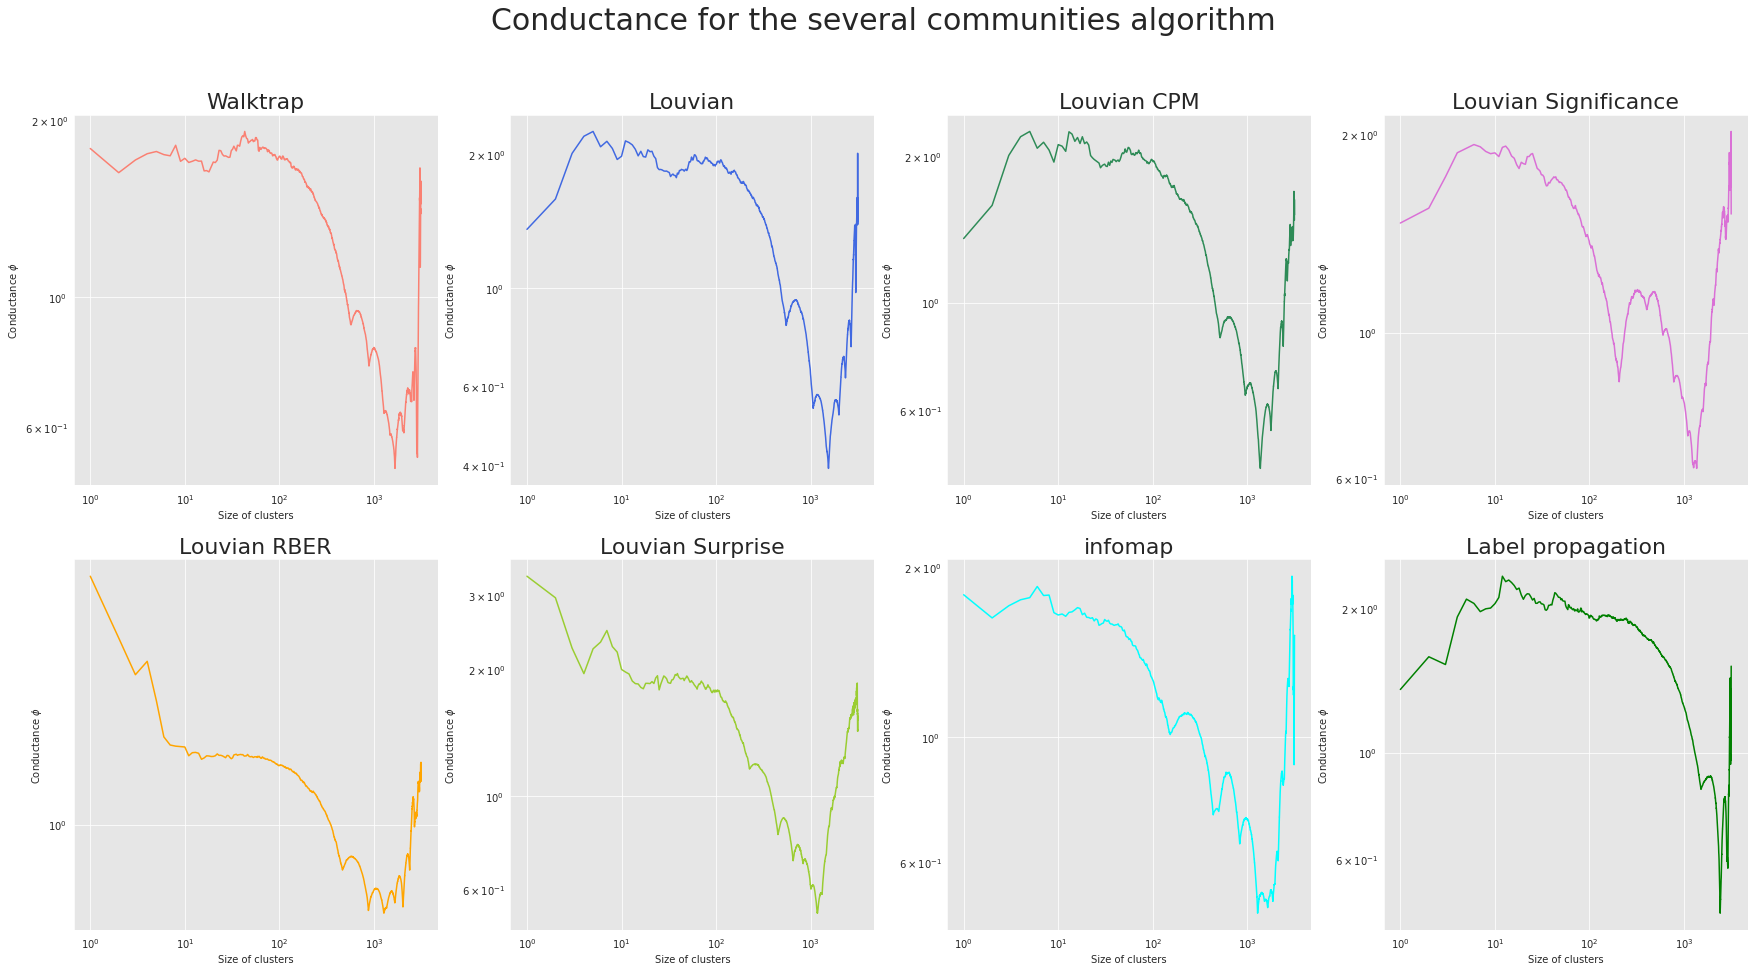

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(30,15))
plt.yscale('symlog')
axs[0,0].axvline(min_wtrap, color = 'salmon',linewidth=2 )
axs[0,0].set_title("Walktrap", fontsize = 22)
axs[0,0].loglog(x, df_conductance_wtrap['Conductance'], label = 'Walktrap', color = 'salmon')
axs[0,1].axvline(min_louvian, color = 'royalblue', linewidth=2)
axs[0,1].set_title("Louvian", fontsize = 22)
axs[0,1].loglog(x, df_conductance_louvian['Conductance'], label = 'Louvian Modularity', color = 'royalblue')
axs[0,2].set_title("Louvian CPM", fontsize = 22)
axs[0,2].axvline(min_louvian_CPM, color = 'seagreen', linewidth=2)
axs[0,2].loglog(x, df_conductance_louvian_CPM['Conductance'], label = 'Louvian CPM', color = 'seagreen')
axs[0,3].set_title("Louvian Significance", fontsize = 22)
axs[0,3].axvline(min_louvian_sig, color = 'plum', linewidth=2)
axs[0,3].loglog(x, df_conductance_louvian_sig['Conductance'] ,label = 'Louvian Significance', color = 'orchid')
axs[1,0].set_title("Louvian RBER", fontsize = 22)
axs[1,0].axvline(min_louvian_RBER, color = 'orange', linewidth=2)
axs[1,0].loglog(x, df_conductance_louvian_RBER['Conductance'], label = 'Louvian RBER', color = 'orange')
axs[1,1].set_title("Louvian Surprise", fontsize = 22)
axs[1,1].axvline(min_louvian_sur, color = 'yellowgreen', linewidth=2)
axs[1,1].loglog(x, df_conductance_louvian_sur['Conductance'], label = 'Louvian Suprise', color = 'yellowgreen')
axs[1,2].set_title("infomap", fontsize = 22)
axs[1,2].axvline(min_infomap, color = 'cyan', linewidth=2)
axs[1,2].loglog(x, df_conductance_infomap['Conductance'], label = 'Infomap', color = 'cyan')
axs[1,3].set_title("Label propagation", fontsize = 22)
axs[1,3].axvline(min_label, color = 'green', linewidth=2)
axs[1,3].loglog(x, df_conductance_label['Conductance'], label = 'Label Propagation', color = 'green')
#legend  = fig.legend(loc='up' , shadow=True, fontsize = 15)
#legend.get_frame().set_facecolor('white')
fig.suptitle('Conductance for the several communities algorithm', fontsize = 30 )

for ax in axs.flat:
    ax.set(ylabel='Conductance $\phi$' , xlabel='Size of clusters')
